# Programming for Data Analysis

## Project 1: Generation of data - Nationality Specific BMI 

## Author: Daniel Mc Donagh

### Introduction

This project will generate random Irish person data using the attributes of age, height, weight and sex. The random generated data will be based on the actual distribution of said data taken from statistical data measurements on the irish population. By utilising census data specific to Ireland and the average means of height and weight specific to the Irish population the calculated BMI index of the generated person data can be shown plotted to a graph for further analysis. It is also enviaged that by replacing the statistical data related to the irish population with data from other nationalities. The generated data could be used to provide insight into how activities or services that are dependant on an average adults height and weight might function over long periods with 1000's of generated body shapes using it. For example comfort in seating sizes at events or acceptable height and weight restrictions on fairground rides.


## Body Mass Index - BMI

BMI is an indicator of the ammount of body fat in a person. It is calculated from the height in meters of a person divided by their weight in kilos squared. The numerical value can then be alligned along a chart to see if a person falls into one of 4 categories. Underweight, Normal, Overweight and Obese.

![BMI Chart](https://www.ncbi.nlm.nih.gov/books/NBK535456/bin/640px-Bmi-chart_colored.jpg)

# Variables


The List of variables to be used in the datarame are 

- ID 
- Gender
- Age
- Height
- Weight

### ID
Each random generated data point representing one person will be assigned a unique ID to identify it.

### Gender
Data taken from the central statistics office shows that since 1971 when there was an equal 50/50 split in the number of males and females in Ireland, the number of females has steadily increased such that in 2022, this had changed with females accounting for 51% of the population.(CSO 2023).Numpy's random choice generator with probability attribute set to the percentage of males and females in the Irish population will be used to accruately generate male and female data points based on this statistic.


### Age


The age attrribute for an average person in Ireland must be weighted against the percentage of that age group in the poulation when a random choice is being used to choose the age. In 2022 there were approximately 768,900 people who were aged 65 or over in the Republic of Ireland, compared with 1.28 million 45 to 64 year old's, and over 1.4 million 25 to 44 year old's, and 651,300 15 to 24 year old's. Additionally there were around a million aged between 0 and 14 in the Republic of Ireland in this year (Statistica 2023).

With a population of 5.01 million people, When converted to a percentage these brackets of ages look like
  - 0 to 14 year olds 1.0 million gives 19.96%
  - 15 to 24 year olds 651,300 gives 13%
  - 25 to 44 year olds 1.4 million gives 27.94%
  - 45 to 64 year olds 1.28 million gives 25.55%
  - 65 and over 768,900 gives 15.34%

As this generated age data will be assigned random height and weight measurments based on an average population mean. I decided to limit the age pool of which numpy could pull random choices from to only age groups of fully developed adults up to retirement age. This will increase the accuracy of the height and weight generated data when generated using a normal distribution via numpy random choice generator function. 

This will reduce the population pool we are working from down to 3,331,300 adult sized persons. The resulting change as a percentage of the overall size when applied to the different age brackets is

- 15 to 24 year olds 651,300 gives 19.5%
- 25 to 44 year olds 1.4 million gives 42%
- 45 to 64 year olds 1.28 million gives 38.5%

### Height

Taken from the wikipedia (Wikipedia.1 2023) the avearage height of different nations. Ireland shows the average heifght of its males and females to be

Males = 1.77m

Females = 1.55m

These mean height values will be added as a attribute to the numpy random choice generator and the random generation of data will be generated around a normal distribution from this mean.

A normal distribution is typified by the data being evenly distirbuted around a mean value. The data forming a bell shape with a higher percentage of the data clustering around the mean and tapering off as you move further waway fromt that mean. Weight of a population closely follows this standard normal distribution (Scribbr, 2023).

![Normal Distribution](https://www.scribbr.de/wp-content/uploads/2023/01/standard-normal-distribution-example.webp)

### Weight

Taken from the list of soverign states by Body Mass Index (Wikipedia.2 2023). The World Health Organisation in 2015 gathered data on the average BMI of both male and female adults in Ireland. 

Males average BMI = 27.9
Females average BMI = 27.1

Reverse calculating mean weight in kilos from this for both males and females gives
  
Males mean average weight is 87.4kilos
Females mean average weight is 66.96kilos

![Ireland placement on Nations BMI index](images\nation bmi list.png)

### Generation of Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:

def generate_synthetic_data(num_points=100):
    data = []
    age_distribution = [
        (15, 24, 0.195),
        (25, 44, 0.42),
        (45, 64, 0.385)
    ]

    for _ in range(num_points):
        age_group = random.choices(age_distribution, weights=[w for _, _, w in age_distribution])[0]
        age = random.randint(age_group[0], age_group[1])
        data.append({'age': age})

    return data

In [3]:
df = pd.DataFrame(index = None)
rng = np.random.default_rng(seed = 1)


NameError: name 'pd' is not defined

In [ ]:
person = []
for i in range (100):
    person.append ("Person {}".format(i+1))

df["person"] = person
df.head()

,person
0,Person 1
1,Person 2
2,Person 3
3,Person 4
4,Person 5


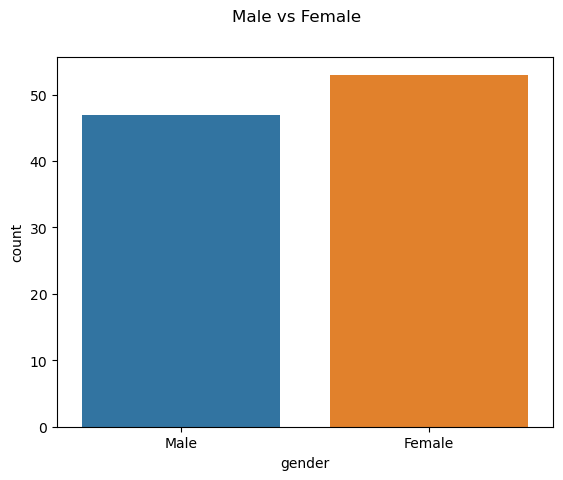

In [ ]:
gender_choice = ["Male","Female"]
gender = rng.choice (gender_choice, p = [0.49, 0.51], size = 100) #(Numpy 2022)
df["gender"] = gender

# Test
sns.countplot(x = df["gender"])
plt.suptitle ("Male vs Female")
plt.show()

In [ ]:
df.head


<bound method NDFrame.head of         person  gender
0     Person 1    Male
1     Person 2    Male
2     Person 3    Male
3     Person 4  Female
4     Person 5    Male
..         ...     ...
95   Person 96    Male
96   Person 97  Female
97   Person 98    Male
98   Person 99    Male
99  Person 100    Male

[100 rows x 2 columns]>

In [ ]:
df["gender"]. value_counts()

Female    52
Male      48
Name: gender, dtype: int64

In [ ]:
age = []
for i in range(100):
    a= np.clip(rng.normal(37.4, 15), 18, 100)
    age.append(int(a))
df["age"] = age

In [ ]:
df.head()

,person,gender,age
0,Person 1,Male,46
1,Person 2,Male,18
2,Person 3,Female,36
3,Person 4,Female,33
4,Person 5,Male,38


## Height Variable
The average height of a male in Ireland was found to be 1.77m. This data 

In [ ]:
mean_height_male = 172
std_dev_male = 7
mean_height_female = 165
std_dev_female = 6
num_samples = 100


height = []
for i in range(100):
    h = np.random.normal(loc=mean_height_male, scale=std_dev_male, size=num_samples)
    height.append(int(h))
df["height"] = height

TypeError: only size-1 arrays can be converted to Python scalars

----------

## References

(Numpy 2022)
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

(CSO 2023)
https://www.cso.ie/en/releasesandpublications/ep/p-ieu50/irelandandtheeuat50/society/population/#:~:text=This%20represents%20a%20percentage%20increase%20of%20almost%2073%25,with%20females%20accounting%20for%2051%25%20of%20the%20population.

(Statista 2023)
https://www.statista.com/statistics/710767/irish-population-by-age/

(Wikipedia.1 2023)
https://en.wikipedia.org/wiki/Average_human_height_by_country

(Wikipedia.2 2023)
https://en.wikipedia.org/wiki/List_of_sovereign_states_by_body_mass_index

(Scribbr, 2023)
https://www.scribbr.com/statistics/normal-distribution/#Why%20Do%20Normal%20Distributions%20Matter?